In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [150]:
num = 14

path = "test/tree3/tree3_box_{}_32_pattern_1.txt".format(num)
# print(path[:-4])
file_name = path[:-4].split("/")[2]
file_name = '_'.join(file_name.split("_")[:4])
# file_name = file_name.split("_")[:4]
print(file_name)


tree3_box_14_32


In [159]:
fs = os.listdir("./test/tree3/")
fs.sort()
filenames = []
for filename in fs:
    # print(filename[-4:])
    # if(filename[-4:] == ".png"):
    #     print(filename)
    #     continue
    if("pattern_1" in filename):
        print(filename, '_'.join(filename.split("_")[:4]))
        filenames.append('_'.join(filename.split("_")[:4]))
    else:
        continue
    # else:
    #     print(filename)

tree3_box_10_32_pattern_1.txt tree3_box_10_32
tree3_box_11_32_pattern_1.txt tree3_box_11_32
tree3_box_12_32_pattern_1.txt tree3_box_12_32
tree3_box_13_32_pattern_1.txt tree3_box_13_32
tree3_box_14_32_pattern_1.txt tree3_box_14_32
tree3_box_16_32_pattern_1.txt tree3_box_16_32
tree3_box_17_32_pattern_1.txt tree3_box_17_32
tree3_box_18_32_pattern_1.txt tree3_box_18_32
tree3_box_19_32_pattern_1.txt tree3_box_19_32
tree3_box_1_32_pattern_1.txt tree3_box_1_32
tree3_box_20_32_pattern_1.txt tree3_box_20_32
tree3_box_21_32_pattern_1.txt tree3_box_21_32
tree3_box_22_32_pattern_1.txt tree3_box_22_32
tree3_box_2_32_pattern_1.txt tree3_box_2_32
tree3_box_3_32_pattern_1.txt tree3_box_3_32
tree3_box_4_32_pattern_1.txt tree3_box_4_32
tree3_box_5_32_pattern_1.txt tree3_box_5_32
tree3_box_6_32_pattern_1.txt tree3_box_6_32
tree3_box_7_32_pattern_1.txt tree3_box_7_32
tree3_box_8_32_pattern_1.txt tree3_box_8_32
tree3_box_9_32_pattern_1.txt tree3_box_9_32


In [ ]:
all_txt = open("test/tree3/tree3_box_{}_32_pattern_1.txt".format(num), 'r')
mask_txt = open("test/tree3/tree3_box_{}_32_pattern_2.txt".format(num), 'r')

size = mask_txt.readline(0)
vox_all = all_txt.readlines()[1].split(",")
vox_mask = mask_txt.readlines()[1].split(",")

size = 32
print(size)
print(len(vox_mask), vox_mask[:10])

In [100]:
all_np = []

for vox in vox_all:
    # print(i, vox)
    if(vox== '0'):
        all_np.append(0)
    elif(vox=='1'):
        all_np.append(1)
    else:
        print(vox)
all_np = np.array(all_np, dtype=np.uint8)
all_np = np.reshape(all_np, (size,size,size))


In [101]:
pattern_2 = []
for vox in vox_mask:
    if(vox== '0'):
        pattern_2.append(0)
    elif(vox=='1'):
        pattern_2.append(1)
    else:
        print(vox)
print(len(pattern_2))


6862


In [102]:
culled_idx = 0
culled_list = []
print(all_np.ravel().shape)
for n, i in enumerate(all_np.ravel()):
    if(i == 1): 
        culled_list.append(n)
print(culled_list[:10])

(32768,)
[7167, 8126, 8127, 8155, 8156, 8157, 8158, 8159, 8188, 8189]


In [103]:

culled_list_index = 0
masked_vol = all_np.ravel().copy()
print(masked_vol.shape)
missing_parts = np.zeros(size**3)


# print len(masked_vol), len(missing_parts)

for i, vox in enumerate(masked_vol):
    if any(i == c for c in culled_list):
        if(pattern_2[culled_list_index] == 1):
            # print("missing parts" , i, "masked vol", masked_vol[i])
            missing_parts[i] = 1
            masked_vol[i] = 0
        culled_list_index +=1

(32768,)


In [104]:
# print(missing_parts.shape, masked_vol.shape)
missing_parts = np.reshape(missing_parts, (size,size,size))
masked_vol = np.reshape(masked_vol, (size,size,size))
print(missing_parts.shape, masked_vol.shape)

# missing

(32, 32, 32) (32, 32, 32)


<Figure size 432x288 with 0 Axes>

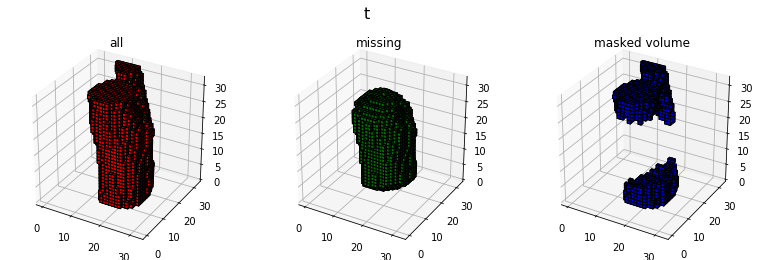

In [160]:

fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.3))
fig.suptitle(filename[0], fontsize=16)

ax1 = fig.add_subplot(131, title='all', projection='3d') 
ax2 = fig.add_subplot(132, title='missing', projection='3d')
ax3 = fig.add_subplot(133, title='masked volume', projection='3d') 
# ax1 = fig.gca(projection='3d')
ax1.voxels(all_np, facecolors='red', edgecolor='k')
ax2.voxels(missing_parts, facecolors='green', edgecolor='k')
ax3.voxels(masked_vol, facecolors='blue', edgecolor='k')
fig_path = "data/" + filenames[0] +".png"
plt.savefig(fig_path) # get only the filename
plt.show()

In [161]:
print(file_name)
np.save("data/" + filenames[0] + "_all.npy", all_np)
np.save("data/" + filenames[0] + "_missing.npy", missing_parts)
np.save("data/" + filenames[0] + "_masked.npy", masked_vol)

tree3_box_14_32


In [106]:

# # prepare some coordinates
# x, y, z = np.indices((8, 8, 8))

# # draw cuboids in the top left and bottom right corners, and a link between them
# cube1 = (x < 3) & (y < 3) & (z < 3)
# cube2 = (x >= 5) & (y >= 5) & (z >= 5)
# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# # combine the objects into a single boolean array
# voxels = cube1 | cube2 | link

# # set the colors of each object
# colors = np.empty(voxels.shape, dtype=object)
# colors[link] = 'red'
# colors[cube1] = 'blue'
# colors[cube2] = 'green'

# # and plot everything
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.voxels(voxels, facecolors=colors, edgecolor='k')

# plt.show()

